<a href="https://colab.research.google.com/github/HenriqueRosa1983/vagrant/blob/main/AS_03_Aula_04_Python_para_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explorando dados com Python/pandas

Por convênção, a biblioteca deve ser importada, utilizando o alias "pd".

In [1]:
import pandas as pd

### Criando _DataFrame_ a partir dos elementos: 
- _columns=_array de nomes de colunas, 
- _data=_ matriz bidimensional contendo os valores das linhas (células), e 
- _index=_ uma lista de rótulos para as linhas

In [2]:
pd.DataFrame(columns=['país','população'], data=[['Brasil',200],['Peru',32],['EUA', 300]], index=('A','B','C'))

,país,população
A,Brasil,200
B,Peru,32
C,EUA,300


In [3]:
dados = {
    'país' : ['Brasil', 'Peru', 'EUA'],
    'população': [200, 32, 300]
}

pd.DataFrame(dados, index=('A','B','C'))

,país,população
A,Brasil,200
B,Peru,32
C,EUA,300


In [4]:
dados = {
    'A': {
        'país': 'Brasil',
        'população': 200
    },
    'B': {
        'país': 'Peru',
        'população': 32
    },
    'C': {
        'país': 'EUA',
        'população': 300
    }
}

pd.DataFrame(dados)

,A,B,C
país,Brasil,Peru,EUA
população,200,32,300


In [5]:
df = pd.DataFrame(dados).transpose()

In [6]:
df

,país,população
A,Brasil,200
B,Peru,32
C,EUA,300


### _Series_

_Series_ em pandas são compostas por um índice (_index_) e um conjunto de valores (_values_)

In [7]:
s = df['país']

s.index

Index(['A', 'B', 'C'], dtype='object')

In [8]:
s.values

array(['Brasil', 'Peru', 'EUA'], dtype=object)

In [12]:
# acessando um elemento pelo índice
s['A']

'Brasil'

In [14]:
s2 = df['população']
s2

A    200
B     32
C    300
Name: população, dtype: object

### Carregando dados a partir de arquivos _csv_

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:


df = pd.read_csv("04-2020.txt", sep=';', header=0, encoding='latin_1', dtype={'qt_sm':'float'}, decimal=',')

In [17]:
df

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
0,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,54,Feira Grande,AL,Transtorno do disco cervical com radiculopatia,Transtornos dos discos cervicais,1
1,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,33,Canapi,AL,Calculose da vesícula biliar com colicistite a...,Colelitíase,1
2,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Santana do Ipanema,AL,NaN,NaN,1
3,Auxílio Doenca Previdenciário,Conc. Base Artigo 27 Inciso Ii do Rbps,Masculino,1.741,2020,5,37,Campo Grande,AL,Hemorragia intracerebral hemisférica cortical,Hemorragia intracerebral,1
4,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,41,Anadia,AL,Nódulo mamário não especificado,Nódulo mamário não especificado,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162231,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,34,São Miguel do Tocantins,TO,Menisco discóide (congênito),Transtornos internos dos joelhos,1
162232,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,21,Araguaína,TO,NaN,NaN,1
162233,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,31,Araguaína,TO,Transtorno não especificado de disco intervert...,Outros transtornos de discos intervertebrais,1
162234,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,43,Santa Fé do Araguaia,TO,Pé chato [pé plano] (adquirido),Outras deformidades adquiridas dos membros,1


## Selecionando colunas

É possível selecionar as colunas que se deseja manter no _DataFrame_, basta informar uma lista contendo o nome das colunas desejadas;

In [18]:
df[['despacho','idade_conc','sigla_uf']]

,despacho,idade_conc,sigla_uf
0,Concessao Normal,54,AL
1,Concessao Normal,33,AL
2,Concessao Normal,52,AL
3,Conc. Base Artigo 27 Inciso Ii do Rbps,37,AL
4,Concessao Normal,41,AL
...,...,...,...
162231,Concessao Normal,34,TO
162232,Concessao Normal,21,TO
162233,Concessao Normal,31,TO
162234,Concessao Normal,43,TO


### Dataframes são por padrão imutáveis. Dessa forma, qualquer método que altere sua estrutura, apenas irá retornar uma cópia alterada. Para manter as alterações é preciso atribuir o resultado a uma variável.

In [19]:
df2 = df[['despacho','idade_conc','sigla_uf']]
df2.columns

Index(['despacho', 'idade_conc', 'sigla_uf'], dtype='object')

In [20]:
df.columns

Index(['especie', 'despacho', 'sexo', 'qt_sm', 'comp_ano', 'comp_mes',
       'idade_conc', 'municipio', 'sigla_uf', 'cid', 'categoria', 'total'],
      dtype='object')

## Filtrando dados

### Um _DataFrame_ pode ser filtrado a partir de uma expressão boleana

In [27]:
df[df['sigla_uf'] =='BA']

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
169,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,49,Salvador,BA,Fratura da extremidade proximal da tíbia,"Fratura da perna, incluindo tornozelo",1
170,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Itapetinga,BA,Transtornos mentais e comportamentais devidos ...,Transtornos mentais e comportamentais devidos ...,1
211,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Masculino,1.853,2020,5,56,Camaçari,BA,NaN,NaN,1
214,Amp. Social Pessoa Portadora Deficiencia,Concessao Normal,Feminino,1.000,2020,5,6,Salvador,BA,Outras esfingolipidoses,Distúrbios do metabolismo de esfingolípides e ...,1
215,Auxílio Doenca por Acidente do Trabalho,Concessao Normal,Feminino,1.000,2020,5,26,Salvador,BA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162172,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,36,Feira de Santana,BA,"Hérnia umbilical com obstrução, sem gangrena",Hérnia umbilical,1
162178,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,35,Candiba,BA,NaN,NaN,1
162186,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,39,Candeias,BA,NaN,NaN,1
162187,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Salvador,BA,Síndrome do túnel do carpo,Mononeuropatias dos membros superiores,1


In [28]:
df[df['idade_conc'] >= 70]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
241,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.029,2020,5,71,Salvador,BA,Dor articular,Outros transtornos articulares não classificad...,1
323,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Masculino,1.000,2020,5,70,Brasília,DF,NaN,NaN,1
882,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,72,Fortaleza,CE,Disfonia,Distúrbios da voz,1
1555,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Masculino,1.000,2020,5,70,Miracema,RJ,NaN,NaN,1
1762,Auxílio Doenca Previdenciário,Concessao em Fase Recursal,Feminino,1.000,2020,5,71,Goiânia,GO,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
160069,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Uberlândia,MG,Neoplasia benigna das meninges cerebrais,Neoplasia benigna das meninges,1
160472,Aposentadoria Invalidez Previdenciária,Concessao Normal,Feminino,1.000,2020,5,72,Picos,PI,Gonartrose primária bilateral,Gonartrose [artrose do joelho],1
160593,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,72,São João de Meriti,RJ,Fratura da rótula [patela],"Fratura da perna, incluindo tornozelo",1
160729,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,71,Macaíba,RN,Varizes dos membros inferiores com úlcera,Varizes dos membros inferiores,1


In [29]:
df[(df['sigla_uf'] =='BA') & (df['idade_conc'] >= 70)]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
241,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.029,2020,5,71,Salvador,BA,Dor articular,Outros transtornos articulares não classificad...,1
14753,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,71,Salvador,BA,Gonartrose primária bilateral,Gonartrose [artrose do joelho],1
14831,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.467,2020,5,71,Salvador,BA,NaN,NaN,1
14956,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Salvador,BA,Neoplasia maligna do trígono da bexiga,Neoplasia maligna da bexiga,1
15052,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.099,2020,5,70,Salvador,BA,NaN,NaN,1
40646,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.000,2020,5,77,Casa Nova,BA,Doença de Parkinson,Doença de Parkinson,1
84545,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,74,Teixeira de Freitas,BA,Doença renal em estádio final,Insuficiência renal crônica,1
84559,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Itamari,BA,NaN,NaN,1
90206,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,72,Itapetinga,BA,NaN,NaN,1
107328,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,73,Ilhéus,BA,Coxartrose primária bilateral,Coxartrose [artrose do quadril],1


### Usando _Series_ booleanas

In [30]:
bol1 = df['sigla_uf'] == 'BA'
bol1

0         False
1         False
2         False
3         False
4         False
          ...  
162231    False
162232    False
162233    False
162234    False
162235    False
Name: sigla_uf, Length: 162236, dtype: bool

In [31]:
df[bol1]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
169,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,49,Salvador,BA,Fratura da extremidade proximal da tíbia,"Fratura da perna, incluindo tornozelo",1
170,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Itapetinga,BA,Transtornos mentais e comportamentais devidos ...,Transtornos mentais e comportamentais devidos ...,1
211,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Masculino,1.853,2020,5,56,Camaçari,BA,NaN,NaN,1
214,Amp. Social Pessoa Portadora Deficiencia,Concessao Normal,Feminino,1.000,2020,5,6,Salvador,BA,Outras esfingolipidoses,Distúrbios do metabolismo de esfingolípides e ...,1
215,Auxílio Doenca por Acidente do Trabalho,Concessao Normal,Feminino,1.000,2020,5,26,Salvador,BA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162172,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,36,Feira de Santana,BA,"Hérnia umbilical com obstrução, sem gangrena",Hérnia umbilical,1
162178,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,35,Candiba,BA,NaN,NaN,1
162186,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,39,Candeias,BA,NaN,NaN,1
162187,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Salvador,BA,Síndrome do túnel do carpo,Mononeuropatias dos membros superiores,1


In [33]:
bol2 = df['idade_conc'] >= 70
bol2

0         False
1         False
2         False
3         False
4         False
          ...  
162231    False
162232    False
162233    False
162234    False
162235    False
Name: idade_conc, Length: 162236, dtype: bool

In [34]:
bol3 = bol1&bol2
df[bol3]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
241,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.029,2020,5,71,Salvador,BA,Dor articular,Outros transtornos articulares não classificad...,1
14753,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,71,Salvador,BA,Gonartrose primária bilateral,Gonartrose [artrose do joelho],1
14831,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.467,2020,5,71,Salvador,BA,NaN,NaN,1
14956,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Salvador,BA,Neoplasia maligna do trígono da bexiga,Neoplasia maligna da bexiga,1
15052,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.099,2020,5,70,Salvador,BA,NaN,NaN,1
40646,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.000,2020,5,77,Casa Nova,BA,Doença de Parkinson,Doença de Parkinson,1
84545,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,74,Teixeira de Freitas,BA,Doença renal em estádio final,Insuficiência renal crônica,1
84559,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Itamari,BA,NaN,NaN,1
90206,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,72,Itapetinga,BA,NaN,NaN,1
107328,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,73,Ilhéus,BA,Coxartrose primária bilateral,Coxartrose [artrose do quadril],1


In [35]:
bol4 = (df['sigla_uf'] == 'BA') & (df['idade_conc'] >= 70)
bol4
df[bol4]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
241,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.029,2020,5,71,Salvador,BA,Dor articular,Outros transtornos articulares não classificad...,1
14753,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,71,Salvador,BA,Gonartrose primária bilateral,Gonartrose [artrose do joelho],1
14831,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.467,2020,5,71,Salvador,BA,NaN,NaN,1
14956,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Salvador,BA,Neoplasia maligna do trígono da bexiga,Neoplasia maligna da bexiga,1
15052,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.099,2020,5,70,Salvador,BA,NaN,NaN,1
40646,Aposentadoria Invalidez Previdenciária,Concessao Normal,Masculino,1.000,2020,5,77,Casa Nova,BA,Doença de Parkinson,Doença de Parkinson,1
84545,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,74,Teixeira de Freitas,BA,Doença renal em estádio final,Insuficiência renal crônica,1
84559,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,70,Itamari,BA,NaN,NaN,1
90206,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,72,Itapetinga,BA,NaN,NaN,1
107328,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,73,Ilhéus,BA,Coxartrose primária bilateral,Coxartrose [artrose do quadril],1


## Exercicio 01

Usando o objeto 'df' criado anteriormente, obtenha:

1. a especie, qt_sm e sexo apenas para os beneficiários do sexo 'Feminino' com qt_sm maior do 2;
2. os benefícios dos estados 'BA', 'SE' e 'PB'.

In [43]:
df9 = df[['especie','qt_sm','sexo']]
df9

,especie,qt_sm,sexo
0,Auxílio Doenca Previdenciário,1.000,Feminino
1,Auxílio Doenca Previdenciário,1.000,Feminino
2,Auxílio Doenca Previdenciário,1.000,Masculino
3,Auxílio Doenca Previdenciário,1.741,Masculino
4,Auxílio Doenca Previdenciário,1.000,Feminino
...,...,...,...
162231,Auxílio Doenca Previdenciário,1.000,Masculino
162232,Auxílio Doenca Previdenciário,1.000,Feminino
162233,Auxílio Doenca Previdenciário,1.000,Masculino
162234,Auxílio Doenca Previdenciário,1.000,Feminino


In [51]:
df9[(df['sexo'] =='Feminino') & (df['qt_sm'] >= 2)]

,especie,qt_sm,sexo
28,Auxílio Doenca Previdenciário,2.023,Feminino
144,Auxílio Doenca por Acidente do Trabalho,4.038,Feminino
204,Auxílio Doenca Previdenciário,2.805,Feminino
346,Auxílio Doenca Previdenciário,2.428,Feminino
410,Auxílio Doenca Previdenciário,2.279,Feminino
...,...,...,...
158763,Auxílio Doenca Previdenciário,3.065,Feminino
159011,Auxílio Doenca por Acidente do Trabalho,3.271,Feminino
159047,Auxílio Doenca Previdenciário,2.411,Feminino
159221,Auxílio Doenca Previdenciário,2.907,Feminino


In [59]:
df[df['sigla_uf'] in ('BA', 'PE', 'SE')]

ValueError: ignored

## Filtro parcial 'like' ou com listas 'in'

In [60]:
df[df.cid.str.contains('transtornos',na=False)]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
50,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.132,2020,5,43,Atalaia,AL,Outros transtornos internos do joelho,Transtornos internos dos joelhos,1
72,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,24,Maceió,AL,Outros transtornos psicóticos não-orgânicos,Outros transtornos psicóticos não-orgânicos,1
108,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Maceió,AL,Outros transtornos do menisco,Transtornos internos dos joelhos,1
125,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,43,Atalaia,AL,Outros transtornos de discos cervicais,Transtornos dos discos cervicais,1
167,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,44,Natal,RN,Outros transtornos do menisco,Transtornos internos dos joelhos,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161339,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,46,Bebedouro,SP,Outros transtornos do menisco,Transtornos internos dos joelhos,1
161673,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,35,João Ramalho,SP,"Outros transtornos do aparelho digestivo, pós-...",Transtornos do aparelho digestivo pós-procedim...,1
161789,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,35,São Paulo,SP,Outros transtornos pulmonares,Outros transtornos respiratórios,1
161870,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,37,São José do Rio Preto,SP,Outros transtornos mentais e comportamentais a...,Transtornos mentais e comportamentais associad...,1


In [61]:
df[df.sigla_uf.isin(['BA','SE','PB'])]

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total
117,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Feminino,1.000,2020,5,44,Aracaju,SE,NaN,NaN,1
118,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,55,Neópolis,SE,Fratura da extremidade distal do rádio,Fratura do antebraço,1
126,Auxílio Acidente,Concessao Decorrente de Acao Judicial,Masculino,0.729,2020,5,40,Campina Grande,PB,NaN,NaN,1
133,Auxílio Acidente,Concessao Decorrente de Acao Judicial,Feminino,0.500,2020,5,53,Riachuelo,SE,NaN,NaN,1
134,Auxílio Doenca Previdenciário,Concessao Decorrente de Acao Judicial,Feminino,1.000,2020,5,38,Brejo dos Santos,PB,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162176,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,48,Patos,PB,Fratura da extremidade distal da tíbia,"Fratura da perna, incluindo tornozelo",1
162178,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,35,Candiba,BA,NaN,NaN,1
162186,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,39,Candeias,BA,NaN,NaN,1
162187,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Salvador,BA,Síndrome do túnel do carpo,Mononeuropatias dos membros superiores,1


## Operações com colunas

Pandas permite que sejam realizadas operações diretamento sobre as colunas, o que gera uma nova coluna com o resultado da operação para cada linha

In [62]:
df['valor_rend'] = df['qt_sm'] * 1200
df.head(5)

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total,valor_rend
0,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,54,Feira Grande,AL,Transtorno do disco cervical com radiculopatia,Transtornos dos discos cervicais,1,1200.0
1,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,33,Canapi,AL,Calculose da vesícula biliar com colicistite a...,Colelitíase,1,1200.0
2,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Santana do Ipanema,AL,NaN,NaN,1,1200.0
3,Auxílio Doenca Previdenciário,Conc. Base Artigo 27 Inciso Ii do Rbps,Masculino,1.741,2020,5,37,Campo Grande,AL,Hemorragia intracerebral hemisférica cortical,Hemorragia intracerebral,1,2089.2
4,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,41,Anadia,AL,Nódulo mamário não especificado,Nódulo mamário não especificado,1,1200.0


In [63]:
df['ano_nasc'] = df['comp_ano'] - df['idade_conc']
df

,especie,despacho,sexo,qt_sm,comp_ano,comp_mes,idade_conc,municipio,sigla_uf,cid,categoria,total,valor_rend,ano_nasc
0,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,54,Feira Grande,AL,Transtorno do disco cervical com radiculopatia,Transtornos dos discos cervicais,1,1200.0,1966
1,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,33,Canapi,AL,Calculose da vesícula biliar com colicistite a...,Colelitíase,1,1200.0,1987
2,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,52,Santana do Ipanema,AL,NaN,NaN,1,1200.0,1968
3,Auxílio Doenca Previdenciário,Conc. Base Artigo 27 Inciso Ii do Rbps,Masculino,1.741,2020,5,37,Campo Grande,AL,Hemorragia intracerebral hemisférica cortical,Hemorragia intracerebral,1,2089.2,1983
4,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,41,Anadia,AL,Nódulo mamário não especificado,Nódulo mamário não especificado,1,1200.0,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162231,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,34,São Miguel do Tocantins,TO,Menisco discóide (congênito),Transtornos internos dos joelhos,1,1200.0,1986
162232,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,21,Araguaína,TO,NaN,NaN,1,1200.0,1999
162233,Auxílio Doenca Previdenciário,Concessao Normal,Masculino,1.000,2020,5,31,Araguaína,TO,Transtorno não especificado de disco intervert...,Outros transtornos de discos intervertebrais,1,1200.0,1989
162234,Auxílio Doenca Previdenciário,Concessao Normal,Feminino,1.000,2020,5,43,Santa Fé do Araguaia,TO,Pé chato [pé plano] (adquirido),Outras deformidades adquiridas dos membros,1,1200.0,1977


## Agrupando dados

### Operações de agrupamento são realizadas pelo método _DataFrame.groupby_

In [64]:
dfg = df[['sexo','total']].groupby('sexo')
dfg

### O método groupby apenas prepara o dataframe para ser agrupado, mas a operação só ocorrerá quando uma função de agregação for executada

In [65]:
dfg.count()

,total
sexo,
Feminino,81573
Masculino,80663


## Agupando com mais de uma coluna númerica

In [67]:
df[['categoria','idade_conc','total']].groupby(by='categoria', sort=True).mean()

,idade_conc,total
categoria,,
Abortamento habitual,33.636364,1.0
Aborto espontâneo,31.378378,1.0
Aborto não especificado,32.866667,1.0
Aborto por razões médicas e legais,33.000000,1.0
"Abscesso cutâneo, furúnculo e antraz",41.794118,1.0
...,...,...
Úlcera dos membros inferiores não classificada em outra parte,46.654321,1.0
Úlcera duodenal,43.250000,1.0
Úlcera gastrojejunal,60.000000,1.0


## Selecionando uma função de agregação para cada coluna

In [68]:
df[['especie','idade_conc','total']].groupby(by='especie', sort=True).agg({'idade_conc':'mean', 'total': 'count'})

,idade_conc,total
especie,,
Amp. Social Pessoa Portadora Deficiencia,38.275591,127
Amparo Social ao Idoso,66.000000,1
Aposent. Invalidez Acidente Trabalho,52.685714,35
Aposentadoria Invalidez Previdenciária,54.583109,1113
Auxílio Acidente,44.378553,1548
Auxílio Acidente Previdenciário,42.828070,855
Auxílio Doenca Previdenciário,42.783000,157820
Auxílio Doenca por Acidente do Trabalho,43.151880,665
Auxílio Salario Maternidade,33.684211,38


### Agrupando por multiplas colunas

In [69]:
df[['especie','despacho','total']].groupby(['especie','despacho']).sum()

total
especie                                  despacho                                       
Amp. Social Pessoa Portadora Deficiencia Conc. Decorrente Revisao Administrativa      21
                                         Concessao Normal                             57
                                         Concessao em Fase Recursal                   49
Amparo Social ao Idoso                   Concessao Normal                              1
Aposent. Invalidez Acidente Trabalho     Concessao Decorrente de Acao Judicial         1
                                         Concessao Normal                             34
Aposentadoria Invalidez Previdenciária   Conc. Decorrente Revisao Administrativa       6
                                         Concessao Decorrente de Acao Judicial         1
                                         Concessao Normal                           1104
                                         Concessao em Fase Recursal                    2
Auxílio Acidente                         Conc. Decorrente Revisao Administrativa       2
                                         Conc. com Base Artigo 35 da Lei 8213/91       2
                                         Concessao Decorrente de Acao Judicial      1505
                                         Concessao Normal                             38
                                         Concessao em Fase Recursal                    1
Auxílio Acidente Previdenciário          Conc. Decorrente Revisao Administrativa       1
                                         Concessao Decorrente de Acao Judicial       782
                                         Concessao Normal                             68
                                         Concessao em Fase Recursal                    4
Auxílio Doenca Previdenciário            Conc. Base Artigo 27 Inciso Ii do Rbps     2145
                                         Conc. Decorrente Revisao Administrativa     613
                                         Concessao Decorrente de Acao Judicial     11488
                                         Concessao Normal                         143187
                                         Concessao em Fase Recursal                  387
Auxílio Doenca por Acidente do Trabalho  Conc. Base Artigo 27 Inciso Ii do Rbps        5
                                         Conc. Decorrente Revisao Administrativa      17
                                         Conc. com Base Artigo 35 da Lei 8213/91       3
                                         Concessao Decorrente de Acao Judicial       245
                                         Concessao Normal                            390
                                         Concessao em Fase Recursal                    5
Auxílio Salario Maternidade              Conc. Decorrente Revisao Administrativa       1
                                         Conc. com Base Artigo 35 da Lei 8213/91       2
                                         Concessao Normal                             29
                                         Concessao em Fase Recursal                    6
Auxílio Suplementar Acidente Trabalho    Concessao Decorrente de Acao Judicial        10
Benefício Indenizatório a Cargo da União Concessao Normal                             15
Pensão por Morte Previdenciária          Conc. Decorrente Revisao Administrativa       1
                                         Concessao Normal                              8

> Por padrão, o pandas cria um índice múltiplo, mas usando o método _DataFrame.reset_index()_ podemos transformar de volta em colunas

In [70]:
df[['especie','despacho','total']].groupby(['especie','despacho']).sum().reset_index()#.head(10)

,especie,despacho,total
0,Amp. Social Pessoa Portadora Deficiencia,Conc. Decorrente Revisao Administrativa,21
1,Amp. Social Pessoa Portadora Deficiencia,Concessao Normal,57
2,Amp. Social Pessoa Portadora Deficiencia,Concessao em Fase Recursal,49
3,Amparo Social ao Idoso,Concessao Normal,1
4,Aposent. Invalidez Acidente Trabalho,Concessao Decorrente de Acao Judicial,1
5,Aposent. Invalidez Acidente Trabalho,Concessao Normal,34
6,Aposentadoria Invalidez Previdenciária,Conc. Decorrente Revisao Administrativa,6
7,Aposentadoria Invalidez Previdenciária,Concessao Decorrente de Acao Judicial,1
8,Aposentadoria Invalidez Previdenciária,Concessao Normal,1104
9,Aposentadoria Invalidez Previdenciária,Concessao em Fase Recursal,2


### Acessando informações sobre o _DataFrame_

In [75]:
df.describe()

,qt_sm,comp_ano,comp_mes,idade_conc,total,valor_rend,ano_nasc
count,162236.000000,162236.0,162236.0,162236.000000,162236.0,162236.000000,162236.000000
mean,1.038317,2020.0,5.0,42.875034,1.0,1245.980927,1977.124966
std,0.257713,0.0,0.0,11.644163,0.0,309.255831,11.644163
min,0.116000,2020.0,5.0,2.000000,1.0,139.200000,1930.000000
25%,1.000000,2020.0,5.0,34.000000,1.0,1200.000000,1968.000000
50%,1.000000,2020.0,5.0,43.000000,1.0,1200.000000,1977.000000
75%,1.000000,2020.0,5.0,52.000000,1.0,1200.000000,1986.000000
max,5.742000,2020.0,5.0,90.000000,1.0,6890.400000,2018.000000


In [76]:
df.especie.describe()

count                            162236
unique                               12
top       Auxílio Doenca Previdenciário
freq                             157820
Name: especie, dtype: object

> Descobrindo valores únicos para uma determinada coluna

In [77]:
df.despacho.unique()

array(['Concessao Normal', 'Conc. Base Artigo 27 Inciso Ii do Rbps',
       'Conc. Decorrente Revisao Administrativa',
       'Concessao Decorrente de Acao Judicial',
       'Concessao em Fase Recursal',
       'Conc. com Base Artigo 35 da Lei 8213/91'], dtype=object)

## Exercício 02

Usando o objeto 'df', faça:

1. Calcule a média de idade por doença e sexo;
2. Calcule o custo total dos benefícios por estado, apenas para os benefícios do tipo "Auxílio Doenca Previdenciário" e "Auxílio Doenca por Acidente do Trabalho" com idade acima de 18 anos.

In [ ]:
df[['categoria','idade_conc','total']].groupby(by='categoria', sort=True).mean()

## Salvando dados em arquivos
é possível salvador um dataframe para um arquivos _csv_ usando o método pd.write_csv()

In [ ]:
df_result = df[['especie','sexo','idade_conc']].groupby(['especie','sexo']).agg({'idade_conc':'mean'}).reset_index()
df_result.to_csv("especie_sexo.csv",sep=';', index=False)

In [ ]:
tipos= ['Auxílio Doenca Previdenciário', 'Auxílio Doenca por Acidente do Trabalho']
pd.DataFrame(df[(df.especie.isin(tipos)) & (df.idade_conc > 18)].groupby('sigla_uf').valor_rend.sum())

,valor_rend
sigla_uf,
AC,350614.8
AL,2847451.2
AM,1443566.4
AP,165463.2
BA,7683297.6
CE,5685855.6
DF,3453182.4
ES,3319868.4
GO,7298604.0


In [ ]:
df[['cid','sexo','idade_conc']].groupby(['cid','sexo']).mean()

idade_conc
cid                                                sexo                 
(Osteo)artrose erosiva                             Feminino    56.333333
                                                   Masculino   42.555556
(Osteo)artrose primária generalizada               Feminino    54.326087
                                                   Masculino   51.680000
Abdome agudo                                       Feminino    40.333333
...                                                                  ...
Úlcera péptica de localização não especificada ... Masculino   58.000000
Úlcera péptica de localização não especificada ... Masculino   52.000000
Úlcera péptica de localização não especificada ... Masculino   29.000000
Útero bicórneo                                     Feminino    22.000000
Útero duplo com duplicação do colo uterino e da... Feminino    27.000000

[5891 rows x 1 columns]

## Exibindo dados com matplotlib

A bilioteca matplotlib permite a construção de gráficos a partir dos dados de um _DataFrame_. Para isso, basta importar a biblioteca pyplot da forma:

``` from matplotlib import pyplot as plt ```

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# agrupando a renda por UF
df_ufs = df[['sigla_uf','valor_rend']].groupby(['sigla_uf']).sum().reset_index()
df_ufs

,sigla_uf,valor_rend
0,AC,361270.8
1,AL,2879341.2
2,AM,1481812.8
3,AP,170222.4
4,BA,7927274.4
5,CE,5906349.6
6,DF,3471052.8
7,ES,3392803.2
8,GO,7360608.0
9,MA,2987109.6


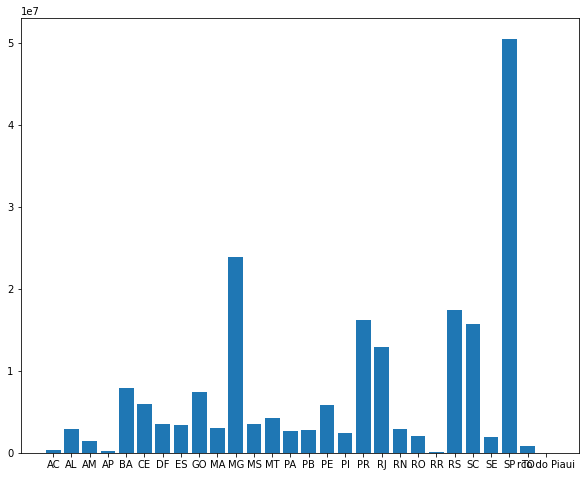

In [ ]:
# solicita ao pyplot a criação de uma área para exibição do gráfico
plt.figure(figsize=(10,8))
# exibe o gráfico
plt.bar(df_ufs['sigla_uf'],df_ufs['valor_rend'])

plt.show()

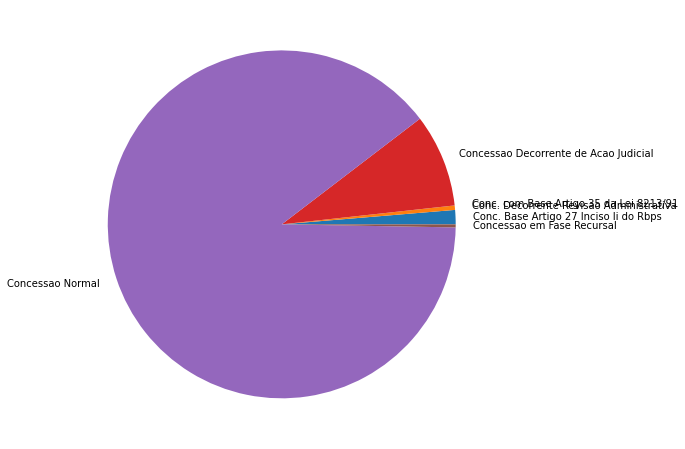

In [ ]:
plt.figure(figsize=(10,8))

df_desp = df[['despacho','total']].groupby(['despacho']).sum().reset_index()
df_desp

plt.pie(df_desp['total'],labels=df_desp['despacho'])
plt.show()

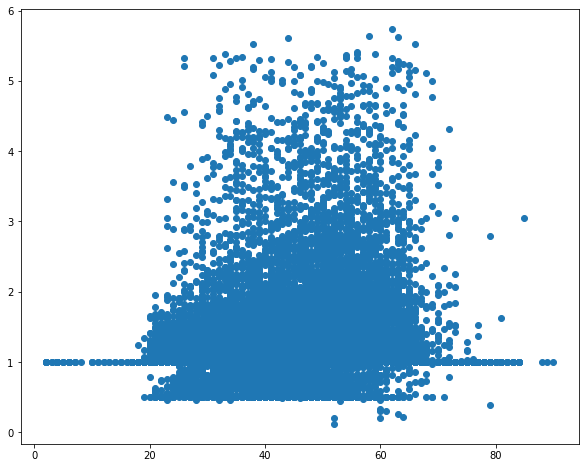

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(df['idade_conc'], df['qt_sm'])
plt.show()

> Duas séries em um mesmo gráfico

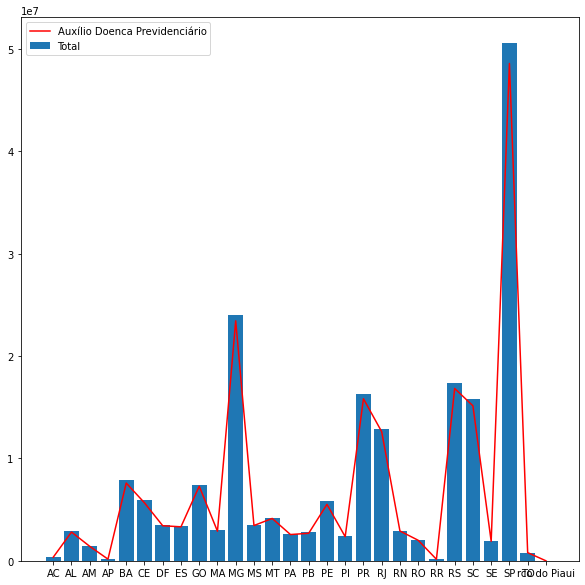

In [ ]:
df_aux = df[df.especie == 'Auxílio Doenca Previdenciário']

dt1 = df[['sigla_uf','valor_rend']].groupby(['sigla_uf']).sum()
dt2 = df_aux[['sigla_uf','valor_rend']].groupby(['sigla_uf']).sum()

fig, axs = plt.subplots(figsize=(10,10))

axs.bar(dt1.index,dt1['valor_rend'], label='Total')
axs.plot(dt2.index,dt2['valor_rend'], label='Auxílio Doenca Previdenciário', c='r')

plt.legend()
plt.show()

> O objeto ` DataFrame ` possui um objeto plot que é uma fachada para os métodos do ` pyplot `, permitindo que os gráicos sejam criados a partir do próprio dataframe

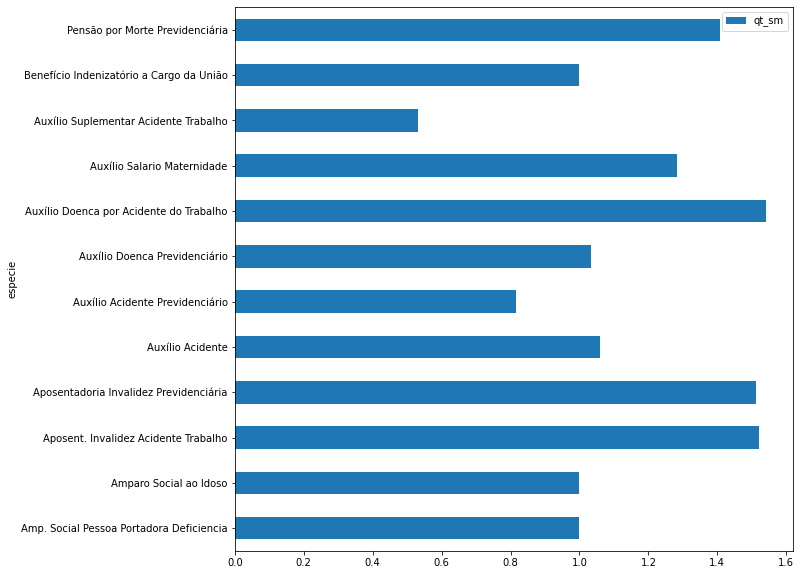

In [ ]:
df[['especie','qt_sm']].groupby('especie', as_index=False).mean().plot.barh(x='especie',y='qt_sm', figsize=(10,10))

plt.show()

> Subdivisões nos eixos

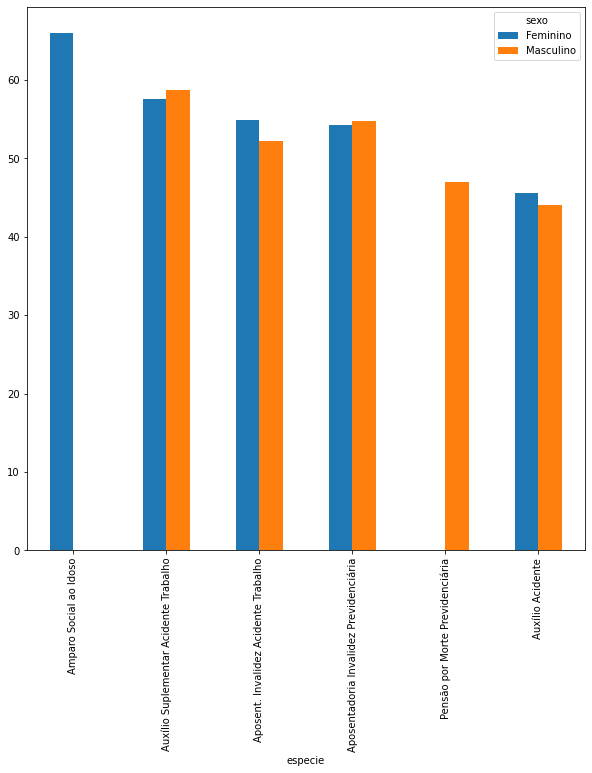

In [ ]:
dados = df[['especie','sexo','idade_conc']].groupby(['especie','sexo']).idade_conc.mean()
dados.sort_values().nlargest(10).unstack().plot.bar(stacked=False, figsize=(10,10))

plt.show()

In [ ]:
df_especie = df.groupby('especie').agg({'especie': 'count', 'valor_rend': 'mean'}).rename(columns={'especie':'qtd'})
df_especie

,qtd,valor_rend
especie,,
Amp. Social Pessoa Portadora Deficiencia,127,1200.000000
Amparo Social ao Idoso,1,1200.000000
Aposent. Invalidez Acidente Trabalho,35,1826.537143
Aposentadoria Invalidez Previdenciária,1113,1815.813477
Auxílio Acidente,1548,1272.506202
Auxílio Acidente Previdenciário,855,977.329123
Auxílio Doenca Previdenciário,157820,1240.466316
Auxílio Doenca por Acidente do Trabalho,665,1850.437895
Auxílio Salario Maternidade,38,1538.147368


In [ ]:
top5_qtd = df_especie.sort_values(by='qtd', ascending=False).head(5)
top5_qtd.plot(kind='pie',subplots=True, figsize=(17,10), 
              title=['Top 5 Espécies por Qtd. de Benefícios', 'Top 5 Especies por Média Valor Líquido'])

plt.show()

In [ ]:
df[['idade_conc','valor_rend']].hist(bins=50, figsize=(17,8))
plt.show()

## Exercício 03

1. Faça um gráfico de pizza que apresente o total de benefícios concedidos por "despacho";

2. Faça um gráfico de barras contendo o total de benefícios concedidos por uf, apenas para a espécie "Auxílio Doenca Previdenciário" e o despacho diferente de "Concessao Normal" e "Conc. Decorrente Revisao Administrativa";